In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

# Data preparation

In [3]:
df = pd.read_csv(r"C:\Users\rvima\MP CROP\Crop_production_.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [4]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (99849, 13)


# Data Pre-Processing

In [5]:
df.isnull().sum()

Unnamed: 0            0
State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [6]:
del df['Unnamed: 0']

In [7]:
df.isnull().sum()

State_Name            0
Crop_Type             0
Crop                  0
N                     0
P                     0
K                     0
pH                    0
rainfall              0
temperature           0
Area_in_hectares      0
Production_in_tons    0
Yield_ton_per_hec     0
dtype: int64

In [8]:
df['Crop'].value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegran

In [9]:
# Filter the DataFrame to only include rows where the 'Crop' is 'Rice'
rice_df = df[(df['State_Name'] == 'kerala') & (df['Crop'] == 'rice')]
# Display the first few rows of the rice data to verify
print(rice_df.head())

# Checking the shape of the new DataFrame to see how many entries are about rice
print("Shape of the rice dataset:", rice_df.shape)

     State_Name Crop_Type  Crop   N   P   K    pH  rainfall  temperature  \
7244     kerala    kharif  rice  80  40  40  5.40   1997.12    27.000000   
7246     kerala    summer  rice  80  40  40  5.34    330.00    29.333333   
7254     kerala      rabi  rice  80  40  40  5.58    490.74    27.600000   
7255     kerala    kharif  rice  80  40  40  5.46   1997.12    27.000000   
7257     kerala    summer  rice  80  40  40  5.38    330.00    29.333333   

      Area_in_hectares  Production_in_tons  Yield_ton_per_hec  
7244            8719.0             17570.0           2.015139  
7246           19058.0             58013.0           3.044024  
7254            7348.0             16098.0           2.190800  
7255           16822.0             28778.0           1.710736  
7257           12446.0             19138.0           1.537683  
Shape of the rice dataset: (530, 12)


In [10]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 7244 to 95912
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State_Name          530 non-null    object 
 1   Crop_Type           530 non-null    object 
 2   Crop                530 non-null    object 
 3   N                   530 non-null    int64  
 4   P                   530 non-null    int64  
 5   K                   530 non-null    int64  
 6   pH                  530 non-null    float64
 7   rainfall            530 non-null    float64
 8   temperature         530 non-null    float64
 9   Area_in_hectares    530 non-null    float64
 10  Production_in_tons  530 non-null    float64
 11  Yield_ton_per_hec   530 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 53.8+ KB


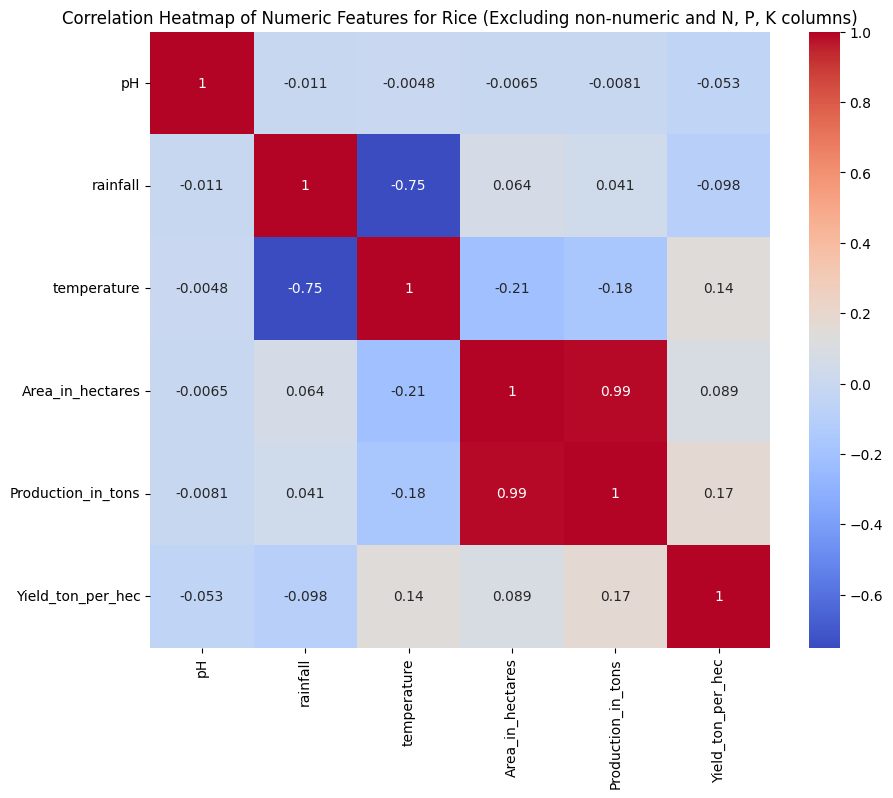

In [11]:
# Exclude 'N', 'P', and 'K' columns from correlation calculation
rice_numeric = rice_df.drop(columns=['N', 'P', 'K'])

# Exclude non-numeric columns and 'N', 'P', 'K' columns from correlation calculation
rice_numeric = rice_df.drop(columns=['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K'])

plt.figure(figsize=(10,8))
sns.heatmap(rice_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features for Rice (Excluding non-numeric and N, P, K columns)')
plt.show()

In [12]:
rice_df.duplicated().sum()

0

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# Splitting the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
print(rice_df.columns)

Index(['State_Name', 'Crop_Type', 'Crop', 'N', 'P', 'K', 'pH', 'rainfall',
       'temperature', 'Area_in_hectares', 'Production_in_tons',
       'Yield_ton_per_hec'],
      dtype='object')


# Data splitting

In [16]:
X=rice_df[['pH','rainfall','temperature','Area_in_hectares']]
Y=rice_df['Production_in_tons']

In [17]:
X

,pH,rainfall,temperature,Area_in_hectares
7244,5.40,1997.12,27.000000,8719.00
7246,5.34,330.00,29.333333,19058.00
7254,5.58,490.74,27.600000,7348.00
7255,5.46,1997.12,27.000000,16822.00
7257,5.38,330.00,29.333333,12446.00
...,...,...,...,...
95894,5.40,1997.12,27.000000,3033.46
95896,5.52,330.00,29.333333,6361.90
95903,5.40,490.74,27.600000,10863.98
95905,5.66,330.00,29.333333,1834.85


In [18]:
Y

7244     17570.00
7246     58013.00
7254     16098.00
7255     28778.00
7257     19138.00
           ...   
95894     6012.32
95896    20223.94
95903    26843.21
95905     5266.37
95912    22644.74
Name: Production_in_tons, Length: 530, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [21]:
X_train

,pH,rainfall,temperature,Area_in_hectares
73816,5.58,330.0,29.333333,60.00
51565,5.60,330.0,29.333333,92.00
51622,5.62,330.0,29.333333,420.00
7246,5.34,330.0,29.333333,19058.00
13535,5.38,330.0,29.333333,917.00
...,...,...,...,...
51655,5.36,330.0,29.333333,8658.00
13502,5.32,330.0,29.333333,217.00
66197,5.40,330.0,29.333333,1595.00
13602,5.34,330.0,29.333333,2750.00


In [22]:
X_test

,pH,rainfall,temperature,Area_in_hectares
73848,5.32,330.00,29.333333,1528.0
88311,5.62,490.74,27.600000,6356.0
81281,5.66,490.74,27.600000,2025.0
59279,5.32,490.74,27.600000,9774.0
59248,5.38,1997.12,27.000000,3937.0
...,...,...,...,...
27538,5.40,490.74,27.600000,4703.0
66119,5.48,1997.12,27.000000,5740.0
66129,5.64,490.74,27.600000,13700.0
66121,5.40,330.00,29.333333,2455.0


In [23]:
X_train

,pH,rainfall,temperature,Area_in_hectares
73816,5.58,330.0,29.333333,60.00
51565,5.60,330.0,29.333333,92.00
51622,5.62,330.0,29.333333,420.00
7246,5.34,330.0,29.333333,19058.00
13535,5.38,330.0,29.333333,917.00
...,...,...,...,...
51655,5.36,330.0,29.333333,8658.00
13502,5.32,330.0,29.333333,217.00
66197,5.40,330.0,29.333333,1595.00
13602,5.34,330.0,29.333333,2750.00


In [24]:
Y_train

73816       97.0
51565      175.0
51622      749.0
7246     58013.0
13535     1540.0
          ...   
51655    26886.0
13502      426.0
66197     5515.0
13602     6978.0
95877     5289.7
Name: Production_in_tons, Length: 424, dtype: float64

# Models

In [42]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train,Y_train)
    y_pred = md.predict(X_test)
    
    print(f"{name} : mae : {mean_absolute_error(Y_test,y_pred)} score : {r2_score(Y_test,y_pred)}")

lr : mae : 2420.9531300626886 score : 0.9802617429009982
lss : mae : 2420.676937543046 score : 0.9802596127502128
Rid : mae : 2420.853179989529 score : 0.9802575929376696
Dtr : mae : 2448.344716981132 score : 0.9811475858700053


# Select Model

In [43]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)
dtr.predict(X_test)

Rid = Ridge()
Rid.fit(X_train,Y_train)
Rid.predict(X_test)

lss = Lasso()
lss.fit(X_train,Y_train)
lss.predict(X_test)

array([ 4.74071753e+03,  1.38215366e+04,  4.07136940e+03,  2.15684367e+04,
        7.95852218e+03,  5.04515338e+03,  1.31545849e+05,  2.71178675e+04,
        5.14189953e+03,  1.00742929e+05,  3.64851967e+03,  1.80997734e+04,
        7.21712974e+03,  4.67768447e+03,  3.68293847e+03,  7.55525405e+03,
        6.71132334e+03,  1.10745260e+04,  9.79286835e+03,  9.01801659e+03,
        1.29885567e+03,  1.12254317e+04,  6.74260416e+03,  1.24652237e+03,
        2.56893604e+04,  8.40822155e+03,  1.39023054e+04,  5.26606674e+04,
        1.44445513e+03,  7.03518353e+03,  5.24005325e+04,  6.69788928e+03,
        7.94196862e+03, -4.31126954e+02,  7.18736198e+03,  8.68757375e+02,
        2.66315810e+04,  2.14206017e+03,  1.49477004e+03,  1.97436981e+03,
        1.96246507e+03,  1.53014610e+03,  5.07267996e+03,  2.90591942e+03,
        1.75833545e+04,  3.06835177e+03,  7.61348617e+03,  1.28142316e+04,
        3.69272457e+04,  1.61543338e+03,  6.53709619e+03,  6.42067799e+03,
        7.91660565e+02,  

# Prediction function

In [44]:
def prediction(pH, rainfall, temperature, Area_in_hectares):
    # Create an array of the input features
    features = np.array([[pH, rainfall, temperature, Area_in_hectares]])

    # Make the prediction directly using the trained model
    predicted_yield = dtr.predict(features)

    return predicted_yield[0]

# Example input values
pH =5.34
rainfall = 330.00
temperature =29.333333
Area_in_hectares = 19058.00

# Make prediction
result = prediction(pH, rainfall, temperature, Area_in_hectares)

print("Predicted yield:", result)

Predicted yield: 58013.0


# Pickle files

In [46]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))

In [47]:
import sklearn
print(sklearn.__version__)

1.2.2
